In [18]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
data = np.load('data/data_w_labels.npz')
Bdata = data['vec']     # Binder Word Vectors
Gdata = data['gVec']    # Google word Vectors
L1 = data['L1']     # Super Category labels
L2 = data['L2']     # Category labels

# Lets try Cosine distances First
# Take Dot Product
angsB = np.matmul(Bdata,Bdata.T)
angsG = np.matmul(Gdata,Gdata.T)
nB = angsB.reshape((1,-1))
nG = angsG.reshape((1,-1))



In [38]:
# New Distances, but real
nnB = np.zeros(np.shape(angsB))
nnG = np.zeros(np.shape(angsB))
for row in range(0,534):
    for column in range(0,534):
        #print( row, ' ' ,column)
        nnB[row, column] = np.linalg.norm(Bdata[row,:] - Bdata[column,:])
        nnG[row, column] = np.linalg.norm(Gdata[row,:] - Gdata[column,:])
    

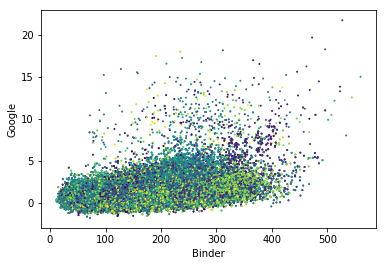

In [23]:
plt.scatter(nB, nG, s=1, c=np.matlib.repmat(L2,1,534) )
plt.xlabel('Binder')
plt.ylabel('Google')
plt.show()

In [34]:
print(np.shape(nB))

(1, 285156)


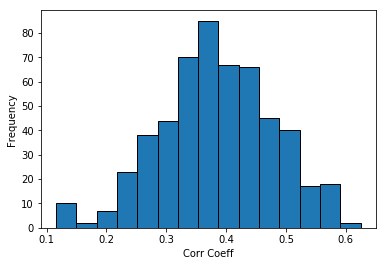

In [39]:
coeff = np.zeros(534)
for idx in range(0,534):
    coeff[idx] = np.corrcoef(nnB[idx],nnG[idx])[0,1]
fig = plt.figure()
plt.hist(coeff,15, edgecolor='k')
plt.xlabel('Corr Coeff')
plt.ylabel('Frequency')
plt.show()